<a href="https://colab.research.google.com/github/JohanSantanaGalvanJob/NaiveBayesPenguins/blob/main/Penguin_NaiveBayes_AllNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Johan Santana Galvan

In [55]:
# importación de datos
import seaborn as sns
penguins = sns.load_dataset('penguins')

# Mapea las columnas "island" y "sex"
mappingIsland = {'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}
mappingSex = {'Male': 0, 'Female': 1}
penguins['island'] = penguins['island'].map(mappingIsland)
penguins['sex'] = penguins['sex'].map(mappingSex)

# Llena los NaN en todo el DataFrame con ceros
# Los datos y las gráficas del DataFrame se han hecho con esto. Pero tambien se puede hacer de otra forma.
# penguins = penguins.fillna(0)

# Esta es la otra forma y con esto los resultados varían ligeramente.
# Si se quiere hacer asi basta con quitar la línea de arriba y la línea de abajo ya que carecen de sentido.
penguins.dropna(inplace=True)

# Si aún quedan NaN en la columna "sex", llénalos específicamente con cero
penguins


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,0,39.1,18.7,181.0,3750.0,0.0
1,Adelie,0,39.5,17.4,186.0,3800.0,1.0
2,Adelie,0,40.3,18.0,195.0,3250.0,1.0
4,Adelie,0,36.7,19.3,193.0,3450.0,1.0
5,Adelie,0,39.3,20.6,190.0,3650.0,0.0
...,...,...,...,...,...,...,...
338,Gentoo,1,47.2,13.7,214.0,4925.0,1.0
340,Gentoo,1,46.8,14.3,215.0,4850.0,1.0
341,Gentoo,1,50.4,15.7,222.0,5750.0,0.0
342,Gentoo,1,45.2,14.8,212.0,5200.0,1.0


In [56]:
# Escalamos los datos

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Supongamos que 'df' es tu DataFrame y 'columnas_a_escalar' es una lista de las columnas que deseas escalar
columnas_a_escalar = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g' ]

# Normalización
scaler = MinMaxScaler()
penguins[columnas_a_escalar] = scaler.fit_transform(penguins[columnas_a_escalar])
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,0,0.254545,0.666667,0.152542,0.291667,0.0
1,Adelie,0,0.269091,0.511905,0.237288,0.305556,1.0
2,Adelie,0,0.298182,0.583333,0.389831,0.152778,1.0
4,Adelie,0,0.167273,0.738095,0.355932,0.208333,1.0
5,Adelie,0,0.261818,0.892857,0.305085,0.263889,0.0
...,...,...,...,...,...,...,...
338,Gentoo,1,0.549091,0.071429,0.711864,0.618056,1.0
340,Gentoo,1,0.534545,0.142857,0.728814,0.597222,1.0
341,Gentoo,1,0.665455,0.309524,0.847458,0.847222,0.0
342,Gentoo,1,0.476364,0.202381,0.677966,0.694444,1.0


In [57]:
# separamos datos de entrada y salida
X_penguins = penguins.drop('species', axis=1)
y_penguins = penguins['species']

# separamos train y test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_penguins, y_penguins, test_size=0.21, random_state=1)

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB

# classifiers
# Si queremos que funcionen los 5 clasificadores ponemos un test size de 0.21.
# Esto es porque CategoricalNB trabaja con valores continuos y con decimales por lo tanto falla.
# Si queremos aumentar el test Size, quitamos categoricalNB.

names = ["GaussianNB", "MultiNomialNB", 'BernouilliNB', 'ComplementNB', 'CategoricalNB']
classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB(), ComplementNB(), CategoricalNB()]

for name, clf in zip(names, classifiers):

  # FIT THE MODEL
  clf.fit(Xtrain, ytrain)
  # PREDIT AND SCORE
  score = clf.score(Xtest, ytest) #Returns the mean accuracy on the given test data and labels.
  print ("Modelo: %s = %6.2f" % (name, score))

Modelo: GaussianNB =   0.86
Modelo: MultiNomialNB =   0.73
Modelo: BernouilliNB =   0.39
Modelo: ComplementNB =   0.74
Modelo: CategoricalNB =   0.66


In [94]:
#Todos los distintos modelos. Descomentar el que tu quieres.
# 2. instanciamos el modelo
model = CategoricalNB()
# model = GaussianNB()
# model = MultinomialNB()
# model = ComplementNB()
# model = BernoulliNB()
# 3. Entrenamiento con los datos
model.fit(Xtrain, ytrain)

CategoricalNB()

In [95]:
# 4. Predicción con nuevos datos
y_model = model.predict(Xtest)
y_model

array(['Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Chinstrap', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie'], dtype='<U9')

In [96]:
# Y finalmente visualizamos la Matriz de Confusión, para lo que se crea la siguiente función, que se llamará más adelante

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

# y_true : dataframe -> Los valores de las clases que son ciertos (test)
# y_pred : ndarray   -> Los valores calculados de las clases después de realizar la predicción
# class  : ndarray   -> Los nombres de las clases/valores objetivos

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

In [ ]:
# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
ytest_df= ytest.to_frame()
ytest_df['species'].replace(['Gentoo', 'Adelie', 'Chinstrap'],[0, 1, 2], inplace=True)
ytest_df

In [98]:
# Transformamos variables categóricas a array para poder llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
import pandas as pd
# Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
y_model_df= pd.DataFrame(y_model, columns = ['species'])
y_model_df['species'].replace(['Gentoo', 'Adelie', 'Chinstrap'],[0, 1, 2], inplace=True)
# Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
y_model_array = y_model_df['species'].to_numpy()
y_model_array

array([0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 1, 2, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 1,
       0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1,
       1, 0, 1, 1])

Confusion matrix, without normalization
[[23  0  0]
 [ 7 16  5]
 [ 0 12  7]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

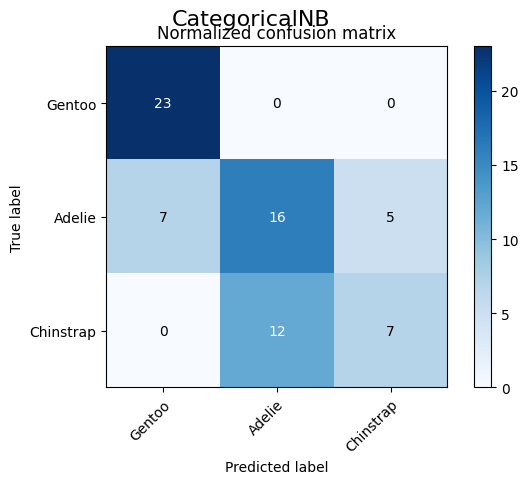

In [100]:
import numpy as np
# Creamos este array porque es el parámetro con las clases que espera la función.
# En titleSup cambiar el nombre a el que estás usando en ese momento.
clases_penguins = np.array(['Gentoo', 'Adelie', 'Chinstrap'])
plot_confusion_matrix(ytest_df['species'], y_model_array, classes=clases_penguins, normalize=False, title='Normalized confusion matrix', titleSup='CategoricalNB')